# Baseline Development: Energy of Tellurium
This journal documents the calculations of extracting and refining Tellurim. Te is a 2ndary mineral typically from copper anode slimes. The anode slime is processed via electrowinning to extract the Te at low quality, then upgraded to semiconductor purity through vacuum distillation, although zone refining is also sometimes used. The manufacturing energy includes a % fuel contribution. Because Te is a secondary product of copper, e_mat_extraction will be copper mining energy, and copper extraction+refining energy will be added to the Te refining and purification energy.

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')

In [4]:
cwd = os.getcwd() #grabs current working directory
print(cwd)

C:\Users\hmirletz\Documents\GitHub\PV_ICE\docs\baseline development documentation


### Copper Refining Energy - Metallurgy

In [5]:
skipcols = ['Source', 'Notes']
e_CuMetallurgy_raw = pd.read_csv(os.path.join(supportMatfolder, "output-energy-copper-metallurgy.csv"), index_col=0)
                           #, usecols=lambda x: x not in skipcols)

In [6]:
e_CuMetallurgy_raw.head()

,E_Cu_metallurgy_kWhpkg,PrctFuel,E_Cu_metallurgy_fuel_kWhpkg
1995,9.587714,42.221508,4.048077
1996,9.517284,42.734129,4.067129
1997,9.407868,43.257701,4.069628
1998,9.381570,44.302701,4.156289
1999,9.269918,45.103279,4.181037


### Refine Te to ~3N

In [7]:
skipcols = ['Source', 'Notes']
e_TeRefine_raw = pd.read_csv(os.path.join(supportMatfolder, "input-energy-CdTe-TeRefining.csv"), index_col='year')
                           #, usecols=lambda x: x not in skipcols)

In [8]:
e_TeRefine_raw.dropna(how='all')

,E_MFG_Te_Refine_[kWh/kg],prct_Fuel,Source,Notes
year,,,,
2009,0.1750,0.0,"Kruyswijk, Lizelle. “Electrorefining of Base M...","treating anode slimes, need to divide by Te re..."
2014,2.0000,0.0,"Subbaiah, Tondepu, Barada Kanta Mishra, Malay ...","year applied for patent, hydrometallurgy"
2019,3.4000,0.0,"Xu, Zhipeng, Xueyi Guo, Qinghua Tian, Dong Li,...","uncited ""typical industry"" energy consumption ..."
2020,1.7376,0.0,"Xu, Zhipeng, Xueyi Guo, Qinghua Tian, Dong Li,...",approx 3 simultaneous papers on cyclone electr...
2023,2.1420,0.0,"Sarangi, Chinmaya Kumar, Abdul Rauf Sheik, Bar...","not a great paper, but has some experimental d..."


Text(0.5, 1.0, 'E_MFG_Te_Refine_[kWh/kg]')

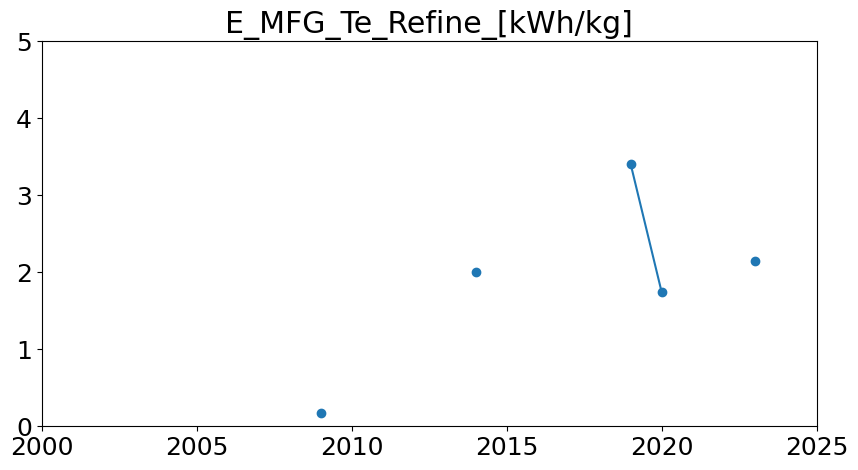

In [9]:
plt.plot(e_TeRefine_raw.index, e_TeRefine_raw.iloc[:,0], marker='o')
plt.xlim(2000,2025)
plt.ylim(0,5)
plt.title(e_TeRefine_raw.columns[0])

The 2009 data point is from a thesis that doesn't provide recovery of Te in mass (only ppm), therefore, we will drop this data point.

The others are hovering around 2 kWh/kg. Therefore, we will take the electrowinning of Te to achieve ~3N to be 2 kWh/kg.

### Purify Te to Semiconductor grade
Literature searches reveal little to no reliable information on purifying Te and the energy consumption thereof via either vacuum distillation or zone refining. Based on the very wide range of adjacent data found, we will estimate 4 kWh/kg for vacuum distillation to purify Te to semiconductor grade.

Therefore, the overall Te specific energy is 6 kWh/kg on top of the required energy to extract copper precursors.

In [12]:
e_CuMetallurgy_raw.head(2)

,E_Cu_metallurgy_kWhpkg,PrctFuel,E_Cu_metallurgy_fuel_kWhpkg
1995,9.587714,42.221508,4.048077
1996,9.517284,42.734129,4.067129


In [14]:
e_CuMetallurgy_raw['E_Te_kWhpkg'] = e_CuMetallurgy_raw.iloc[:,0]+6
e_CuMetallurgy_raw['E_Te_fuelfract'] = e_CuMetallurgy_raw['E_Cu_metallurgy_fuel_kWhpkg']/e_CuMetallurgy_raw['E_Te_kWhpkg']*100
e_CuMetallurgy_raw.head()

,E_Cu_metallurgy_kWhpkg,PrctFuel,E_Cu_metallurgy_fuel_kWhpkg,E_Te_kWhpkg,E_Te_fuelfract
1995,9.587714,42.221508,4.048077,15.587714,25.969667
1996,9.517284,42.734129,4.067129,15.517284,26.210311
1997,9.407868,43.257701,4.069628,15.407868,26.412658
1998,9.381570,44.302701,4.156289,15.381570,27.021227
1999,9.269918,45.103279,4.181037,15.269918,27.380874


In [18]:
e_Te_final = e_CuMetallurgy_raw.filter(like='_Te').round(2)
e_Te_final.to_csv(os.path.join(supportMatfolder,'output-energy-CdTe-TeMFGingE.csv'))